In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Loading dataset
netflix = pd.read_csv('netflix.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#General information of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Checking for null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Analysis

In [6]:
#Total Films
total_films = netflix['show_id'].count()
total_films

8807

In [7]:
#Percentage of Movies
movie = netflix[netflix['type'] == 'Movie']['type'].count()
movie = (movie / total_films) * 100
print(f'{np.round(movie,2)}%')

69.62%


In [8]:
#Percentage of TV Shows
tv_show = netflix[netflix['type'] == 'TV Show']['type'].count()
tv_show = (tv_show / total_films) * 100
print(f'{np.round(tv_show,2)}%')

30.38%


In [9]:
#Replacing null values
netflix['duration'].fillna(value='none', inplace=True)

In [10]:
#Average duration of Movies in mins
avg_movie_duration = netflix.loc[netflix['duration'].str.contains('min')]['duration']
avg_movie_duration = avg_movie_duration.str.split(' ', expand=True)[0]
avg_movie_duration = pd.to_numeric(avg_movie_duration)
np.round(avg_movie_duration.mean(),2)

99.58

In [11]:
#Average duration of TV Shows in season
avg_tv_duration = netflix.loc[netflix['duration'].str.contains('Season')]['duration']
avg_tv_duration = avg_tv_duration.str.split(' ', expand=True)[0]
avg_tv_duration = pd.to_numeric(avg_tv_duration)
np.round(avg_tv_duration.mean(),2)

1.76

#### Showing the rating difference between TV Shows and Movies with a bi-directional bar chart
- First create an appropriate DataFrame for the task
- Then, plot the graph

In [12]:
#Creating a dataframe for Movies rating
movie_rating = pd.DataFrame(netflix[netflix['type'] == 'Movie']['rating'])
movie_rating['Movie'] = 2
movie_rating = pd.DataFrame(movie_rating.groupby('rating').count()).sort_values('Movie', ascending=False)

#Creating a dataframe for TV Shows rating
tv_rating = pd.DataFrame(netflix[netflix['type'] == 'TV Show']['rating'])
tv_rating['TV Show'] = 2
tv_rating = pd.DataFrame(tv_rating.groupby('rating').count()).sort_values('TV Show', ascending=False)

#Combining Movies rating and TV Shows rating dataframes and converting to float type.
movie_rating['TV Show'] = tv_rating['TV Show'].astype(float)
movie_rating['Movie'] = movie_rating['Movie'].astype(float)

#Replacing null values
movie_rating['TV Show'].fillna(value=0, inplace=True)
movie_rating

,Movie,TV Show
rating,,
TV-MA,2062.0,1145.0
TV-14,1427.0,733.0
R,797.0,2.0
TV-PG,540.0,323.0
PG-13,490.0,0.0
PG,287.0,0.0
TV-Y7,139.0,195.0
TV-Y,131.0,176.0
TV-G,126.0,94.0


In [13]:
#Reducing the data to the top 10 ratings
movie_rating = movie_rating.head(10)
movie_rating

,Movie,TV Show
rating,,
TV-MA,2062.0,1145.0
TV-14,1427.0,733.0
R,797.0,2.0
TV-PG,540.0,323.0
PG-13,490.0,0.0
PG,287.0,0.0
TV-Y7,139.0,195.0
TV-Y,131.0,176.0
TV-G,126.0,94.0


In [14]:
#Setting the title, font and color variables to be used in the graph
title0 = 'Movie Rating'
title1 = 'TV show Rating'
tick_font = {'fontname' : 'Times New Roman'}
tick_color = {'labelcolor' : 'white'}

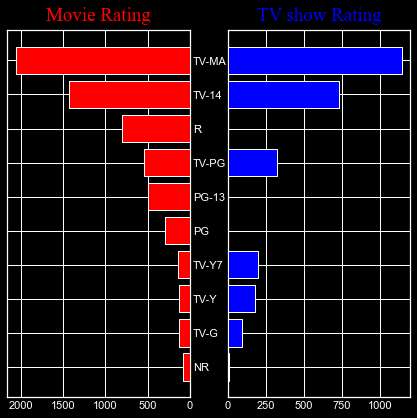

In [15]:
fig, axes = plt.subplots(figsize=(7,6), facecolor='black', ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(movie_rating.index, movie_rating['Movie'], align='center', color='red', zorder=12)
axes[0].set_title(title0, fontsize=19, pad=9, color='red', **tick_font)
axes[1].barh(movie_rating.index, movie_rating['TV Show'], align='center', color='blue', zorder=12)
axes[1].set_title(title1, fontsize=19, pad=9, color='blue', **tick_font)
axes[0].invert_xaxis()
axes[0].set_facecolor('black')
axes[1].set_facecolor('black')
plt.gca().invert_yaxis()
#
axes[0].yaxis.tick_right()
axes[0].yaxis.set_tick_params(length=0, **tick_color)
axes[0].xaxis.set_tick_params(length=0, **tick_color)
axes[1].xaxis.set_tick_params(length=0, **tick_color)
plt.subplots_adjust(wspace=0.21, top=0.95, bottom=0.1, left=0.1, right=0.9)

#### Chart review
- From the above chart we can see that the most popular rating between movie and tv show is TV-MA.
- We can also see that the movie has more ratings than tv shows